# CPS 3

## Question 1

### Questions 1-a and 1-b

In [100]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Sep 27 22:49:33 2018

@author: yassine
"""

################################################
######## Importing useful modules ##############
################################################

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from numba import jit
import scipy.stats as sps

%matplotlib qt4


@jit
def Brownian_Generator(T,n,N):
    """
        This function generates N trajectories of the Brownian motion W with T/n the step of dicretization
        
        and [0,T] is the time interval on which we simulate.
        
        Each column of W is a trajectory among the N trajectories.
    
    """
    
    
    Delta_T = T/n
    Z = np.random.normal(0,1,size=(n,N))
    
    W = np.zeros((n+1,N))
    W[1:,:] = np.cumsum(np.sqrt(Delta_T)*Z,axis=0)
    
    return W

In [87]:
T = 2      # Time Horizon
n = 100    # Discretization parameter 
N = 1000   # Number of copies
    

# A Matrix of Brownian motion simulation.    
W = Brownian_Generator(T,n,N)
    

I_copies = 0.5* (W[n,:]**2) -  np.sum(W[:n,:]*(W[1:,:]-W[:n,:]),axis=0)
J_copies = 0.5* (W[n,:]**2) -  np.sum(W[1:,:]*(W[1:,:]-W[:n,:]),axis=0)
K_copies = 0.5* (W[n,:]**2) -  np.sum(((W[1:,:]+W[:n,:])/2.)*(W[1:,:]-W[:n,:]),axis=0)
    

I_mean = np.mean(I_copies)
J_mean = np.mean(J_copies)
K_mean = np.mean(K_copies)

print("mean of I: ",I_mean)
print("mean of J: ",J_mean)
print("mean of K: ",K_mean)    




mean of I:  0.997741668358
mean of J:  -0.997741668358
mean of K:  1.2040136488e-17


### Question 1-c

In [88]:
I_means_list=[] ## A list to store means of (W_T**2 - I_n) variable.
J_means_list=[] ## A list to store means with the (W_T**2 - J_n) variable.
K_means_list=[] ## A list to store means with the (W_T**2 - K_n) variable.

sigmas_I = []  ## A list to store STDs with the (W_T**2 - I_n) variable.
sigmas_J = []  ## A list to store STDs with the (W_T**2 - I_n) variable.
sigmas_K = []  ## A list to store STDs with the I_n variable.

alpha = 0.05
q = sps.norm.ppf(1-alpha/2, loc=0, scale=1)

list_n = range(10,100,5)
for n in list_n:
    
    W = Brownian_Generator(T,n,N)
    
    I_copies = 0.5* (W[n,:]**2) -  np.sum(W[:n,:]*(W[1:,:]-W[:n,:]),axis=0)
    J_copies = 0.5* (W[n,:]**2) -  np.sum(W[1:,:]*(W[1:,:]-W[:n,:]),axis=0)
    K_copies = 0.5* (W[n,:]**2) -  np.sum(((W[1:,:]+W[:n,:])/2.)*(W[1:,:]-W[:n,:]),axis=0)

    
    I_means_list.append(np.mean(I_copies))
    J_means_list.append(np.mean(J_copies))
    K_means_list.append(np.mean(K_copies))
    
    
    sigmas_I.append(np.std(I_copies))
    sigmas_J.append(np.std(J_copies))
    sigmas_K.append(np.std(K_copies))
    

    
## Computing confidence intervals widths.

Confidance_Interval_widths_I = q*np.array(sigmas_I)/np.sqrt(N)
Confidance_Interval_widths_J = q*np.array(sigmas_J)/np.sqrt(N)
Confidance_Interval_widths_K = q*np.array(sigmas_K)/np.sqrt(N)
    
    
    
    
    

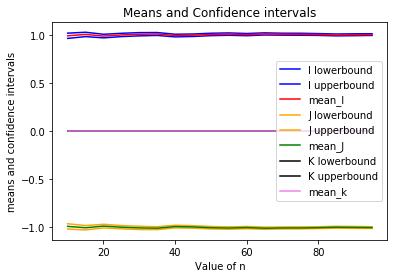

In [89]:

##### plotting results.

plt.figure(1)

plt.plot(list_n,I_means_list-Confidance_Interval_widths_I,color ="blue" , label="I lowerbound")
plt.plot(list_n,I_means_list+Confidance_Interval_widths_I,color ="blue" , label="I upperbound")
plt.plot(list_n,I_means_list,color ="red" , label="mean_I")


plt.plot(list_n,J_means_list-Confidance_Interval_widths_J,color ="orange" , label="J lowerbound")
plt.plot(list_n,J_means_list+Confidance_Interval_widths_J,color ="orange" , label="J upperbound")
plt.plot(list_n,J_means_list,color ="green" , label="mean_J")


plt.plot(list_n,K_means_list-Confidance_Interval_widths_K,color ="black" , label="K lowerbound")
plt.plot(list_n,K_means_list+Confidance_Interval_widths_K,color ="black" , label="K upperbound")
plt.plot(list_n,K_means_list,color ="violet" , label="mean_k")


plt.xlabel("Value of n")
plt.ylabel("means and confidence intervals")

plt.title("Means and Confidence intervals")


plt.legend(loc="best")

## Question 2

In [90]:
T = 2      # Time Horizon
n = 100    # Discretization parameter 
N = 1000   # Number of copies
    

# A Matrix of Brownian motion simulation.    
W = Brownian_Generator(T,n,N)
    
    
times = np.array([np.linspace(0,T,n+1)]).T

A_copies = 0.5* (W[n,:]**2) -  np.sum(np.exp(times[:n])*(W[1:,:]-W[:n,:]),axis=0)
B_copies = 0.5* (W[n,:]**2) -  np.sum(np.exp(times[1:])*(W[1:,:]-W[:n,:]),axis=0)
C_copies = 0.5* (W[n,:]**2) -  np.sum(np.exp(0.5*(times[1:]+times[:n])) *(W[1:,:]-W[:n,:]),axis=0)
    



A_mean = np.mean(A_copies)
B_mean = np.mean(B_copies)
C_mean = np.mean(C_copies)

print("mean of A ",A_mean)
print("mean of B: ",B_mean)
print("mean of C: ",C_mean)



mean of A  0.9359958833
mean of B:  0.935556958896
mean of C:  0.9357775184


In [91]:
T = 2      # Time Horizon
N = 1000   # Number of copies
    

A_means_list=[] ## A list to store means of (W_T**2 - I_n) variable.
B_means_list=[] ## A list to store means with the (W_T**2 - J_n) variable.
C_means_list=[] ## A list to store means with the (W_T**2 - K_n) variable.

sigmas_A = []  ## A list to store STDs with the (W_T**2 - I_n) variable.
sigmas_B = []  ## A list to store STDs with the (W_T**2 - I_n) variable.
sigmas_C = []  ## A list to store STDs with the I_n variable.

alpha = 0.05
q = sps.norm.ppf(1-alpha/2, loc=0, scale=1)

list_n=range(10,100)

for n in list_n:
    
    W = Brownian_Generator(T,n,N)
    times = np.array([np.linspace(0,T,n+1)]).T
    
    
    A_copies = 0.5* (W[n,:]**2) -  np.sum(np.exp(times[:n])*(W[1:,:]-W[:n,:]),axis=0)
    B_copies = 0.5* (W[n,:]**2) -  np.sum(np.exp(times[1:])*(W[1:,:]-W[:n,:]),axis=0)
    C_copies = 0.5* (W[n,:]**2) -  np.sum(np.exp(0.5*(times[1:]+times[:n])) *(W[1:,:]-W[:n,:]),axis=0)


    
    A_means_list.append(np.mean(A_copies))
    B_means_list.append(np.mean(B_copies))
    C_means_list.append(np.mean(C_copies))
    
    
    sigmas_A.append(np.std(A_copies))
    sigmas_B.append(np.std(B_copies))
    sigmas_C.append(np.std(C_copies))
    

    
## Computing confidence intervals widths.

Confidance_Interval_widths_A = q*np.array(sigmas_A)/np.sqrt(N)
Confidance_Interval_widths_B = q*np.array(sigmas_B)/np.sqrt(N)
Confidance_Interval_widths_C = q*np.array(sigmas_C)/np.sqrt(N)
    
    
    
    
    

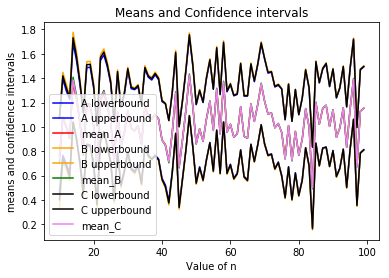

In [93]:

##### plotting results.

plt.figure(2)

plt.plot(list_n,A_means_list-Confidance_Interval_widths_A,color ="blue" , label="A lowerbound")
plt.plot(list_n,A_means_list+Confidance_Interval_widths_A,color ="blue" , label="A upperbound")
plt.plot(list_n,A_means_list,color ="red" , label="mean_A")


plt.plot(list_n,B_means_list-Confidance_Interval_widths_B,color ="orange" , label="B lowerbound")
plt.plot(list_n,B_means_list+Confidance_Interval_widths_B,color ="orange" , label="B upperbound")
plt.plot(list_n,B_means_list,color ="green" , label="mean_B")


plt.plot(list_n,C_means_list-Confidance_Interval_widths_C,color ="black" , label="C lowerbound")
plt.plot(list_n,C_means_list+Confidance_Interval_widths_C,color ="black" , label="C upperbound")
plt.plot(list_n,C_means_list,color ="violet" , label="mean_C")


plt.xlabel("Value of n")
plt.ylabel("means and confidence intervals")

plt.title("Means and Confidence intervals")


plt.legend()

## Question 3

### Question 3-a

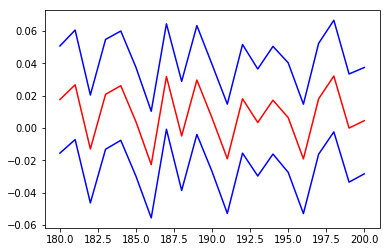

In [95]:
T = 2      # Time Horizon
M = 1000   # Number of copies
    
A_means_list=[] ## A list to store means of (W_T**2 - I_n) variable.

sigmas_A = []  ## A list to store STDs with the (W_T**2 - I_n) variable.

alpha = 0.05
q = sps.norm.ppf(1-alpha/2, loc=0, scale=1)


list_n=range(180,201)

for n in list_n:
    
    W = Brownian_Generator(T,n,M)
    times = np.array([np.linspace(0,T,n+1)]).T
    
    A_copies =  np.sin(W[n,:]) -  np.mean(np.sin(W[:n,:]),axis=0)/2 

    A_means_list.append(np.mean(A_copies))
  
    sigmas_A.append(np.std(A_copies))
  
    
## Computing confidence intervals widths.

Confidance_Interval_widths_A = q*np.array(sigmas_A)/np.sqrt(M)

plt.figure(3)

plt.plot(list_n,A_means_list-Confidance_Interval_widths_A,color ="blue" , label="A lowerbound")
plt.plot(list_n,A_means_list+Confidance_Interval_widths_A,color ="blue" , label="A upperbound")
plt.plot(list_n,A_means_list,color ="red" , label="mean_A")



In [96]:
T = 2      # Time Horizon
M = 1000   # Number of copies
n = 1000


W = Brownian_Generator(T,n,N)
I_copies = 0.5* (W[n,:]**2) -  np.sum(W[:n,:]*(W[1:,:]-W[:n,:]),axis=0)




/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


0.84183861598393339

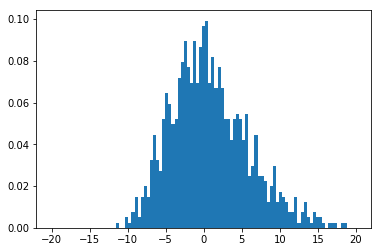

In [97]:
T = 2      # Time Horizon
M = 1000   # Number of copies
n = 1000


W = Brownian_Generator(T,n,N)
times = np.array([np.linspace(0,T,n+1)]).T


A_copies = 0.5* (W[n,:]**2) -  np.sum(np.exp(times[:n])*(W[1:,:]-W[:n,:]),axis=0)


figure = plt.figure(2)
plt.hist(A_copies,bins=np.linspace(-20,20,100),normed=1)

np.mean(A_copies)

In [103]:
T = 2      # Time Horizon
M = 100000   # Number of copies
n = 100

W = Brownian_Generator(T,n,M)
times = np.array([np.linspace(0,T,n+1)]).T

A_copies =  np.sin(W[n,:]) -  np.sum(np.sin(W[:n,:]),axis=0)/(2*n) 


figure = plt.figure(2)
a = plt.hist(A_copies,bins=np.linspace(-2,2,1000),normed=1)




/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
